In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

In [5]:
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

pixel_values, targets = data

targets = targets.astype(int)

In [11]:
pixel_values = np.array(pixel_values)

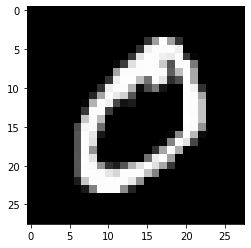

In [12]:
single_image = pixel_values[1, :].reshape(28,28)

plt.imshow(single_image, cmap='gray')

In [13]:
tsne = manifold.TSNE(n_components=2, random_state=42)

transformed_data = tsne.fit(pixel_values[:3000, :])

C:\Users\samuelyusuf\Miniconda3\envs\aaamlp_env\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\samuelyusuf\Miniconda3\envs\aaamlp_env\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [21]:
transformed_data.embedding_.shape

(3000, 2)

In [22]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data.embedding_, targets[:3000])),
            columns=["x1", "x2", "targets"]
            )
        
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [23]:
tsne_df

,x1,x2,targets
0,31.722771,-16.391663,5
1,10.612940,-67.804901,0
2,49.593014,38.388294,4
3,-37.814510,32.660255,1
4,22.104887,31.574816,9
...,...,...,...
2995,1.683464,53.675167,7
2996,14.697905,-62.843128,0
2997,-7.642507,42.416336,9
2998,-58.103531,-4.892649,1


C:\Users\samuelyusuf\Miniconda3\envs\aaamlp_env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


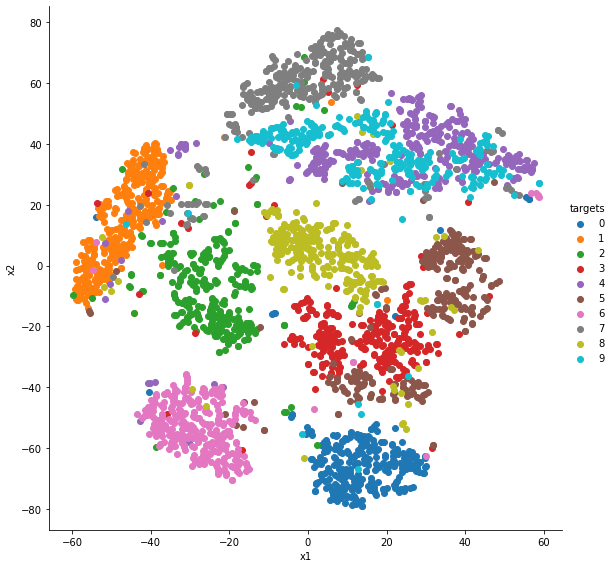

In [25]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)

grid.map(plt.scatter, "x1", "x2").add_legend()